<a href="https://colab.research.google.com/github/DmitryKutsev/NIS_SentiFrame/blob/master/fasttext_research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

In [0]:
grisha = pd.read_csv(\
    'https://raw.githubusercontent.com/DmitryKutsev/NIS_SentiFrame/master/annotations/annotation_arshinov.csv', delimiter=';')
ira = pd.read_csv(\
    'https://raw.githubusercontent.com/DmitryKutsev/NIS_SentiFrame/master/annotations/annotation_ira.csv')
lesha = pd.read_csv(\
    'https://raw.githubusercontent.com/DmitryKutsev/NIS_SentiFrame/master/annotations/annotation_lesha.csv')
masha = pd.read_csv(\
    'https://raw.githubusercontent.com/DmitryKutsev/NIS_SentiFrame/master/annotations/annotation_masha.csv')
olya = pd.read_csv(\
    'https://raw.githubusercontent.com/DmitryKutsev/NIS_SentiFrame/master/annotations/annotation_olya.csv')

In [0]:
ton_df = pd.DataFrame({'verb': ira['verb'], 'count': grisha['Unnamed: 1'] + \
                       ira['0/1'] + lesha['0/1'] + masha['0 или 1'] + olya['0/1']})

In [4]:
ton_df

,verb,count
0,сообщать,0
1,сообщить,0
2,принять,2
3,задержать,4
4,провести,0
...,...,...
995,влюбляться,5
996,разнести,3
997,воздвигнуть,3
998,понаблюдать,0


In [5]:
for num, verb in enumerate(ton_df['verb']):
 if verb not in list(senti_df['verb']):
   #print(verb, num)
   try:
    ton_df= ton_df.drop(num)
   except:
     pass


NameError: ignored

In [0]:
ton_df

In [6]:
for num, count in enumerate(ton_df['count']):
  if count==0:
    try:
     print(ton_df['verb'][num])
    except:
     pass


сообщать
сообщить
провести
пройти
писать
начать
считать
сделать
найти
появиться
решить
предложить
начаться
добавить
использовать
проходить
подписать
пытаться
написать
вести
проводить
принимать
пояснить
стоить
прийтись
представлять
призвать
построить
объяснить
следовать
предлагать
делать
продолжаться
продолжать
завершиться
увеличить
запустить
видеть
увеличиться
оценить
возникнуть
прийти
прокомментировать
увидеть
комментировать
снизиться
объединить
превысить
утвердить
пользоваться
снизить
обещать
вывести
потратить
приостановить
рассчитывать
начинать
ждать
закрыть
искать
приходиться
произвести
создавать
сократиться
родиться
приступить
повысить
закончиться
появляться
возобновить
выпускать
сформировать
понимать
оценивать
воспользоваться
производить
применить
объяснять
строить
последовать
перестать
предпринять
закончить
перекрыть
опуститься
посчитать
обновить
образоваться
изучить
решать
добавлять
усилить
остановиться
чувствовать
применять
изучать
заказать
возникать
приходить
посоветовать
ини

In [0]:
senti_df = pd.read_csv(\
    'https://raw.githubusercontent.com/DmitryKutsev/NIS_SentiFrame/master/annotations/SENTIFRAME%20-%20case_annotation.csv')

In [8]:
'арестовать' in list(senti_df['verb'])

True

In [0]:
senti_df['polarity_summ'] = senti_df['polarity_masha'] + senti_df['polarity_dima'] + senti_df['polarity_ira']

In [0]:
my_senti_df = senti_df.drop(['polarity_dima', 'polarity_masha', 'polarity_ira', 'падеж первого аргумента, по умолчанию nomn', '"Класс"','rel(А0,A1)','rel(А1,A0)'], axis=1)

In [0]:
my_senti_df['падеж второго аргумента в нотации pymorphy2'] = my_senti_df['падеж второго аргумента в нотации pymorphy2, по умолчанию accs']

In [14]:
my_senti_df = my_senti_df.drop(['падеж второго аргумента в нотации pymorphy2, по умолчанию accs'], axis=1)
my_senti_df = my_senti_df.drop(['Комментарий'], axis=1)
my_senti_df['polar_or_not'] = list(ton_df['count'])
my_senti_df

KeyError: ignored

In [15]:
#tayga_none_fasttextcbow_300_10_2019

!wget http://vectors.nlpl.eu/repository/20/187.zip

--2020-06-05 13:18:43--  http://vectors.nlpl.eu/repository/20/187.zip
Resolving vectors.nlpl.eu (vectors.nlpl.eu)... 129.240.189.225
Connecting to vectors.nlpl.eu (vectors.nlpl.eu)|129.240.189.225|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2692389554 (2.5G) [application/zip]
Saving to: ‘187.zip’

187.zip             100%[===================>]   2.51G  23.2MB/s    in 1m 57s  

2020-06-05 13:20:41 (21.9 MB/s) - ‘187.zip’ saved [2692389554/2692389554]



In [16]:
!unzip 187.zip

Archive:  187.zip
  inflating: meta.json               
  inflating: model.model             
  inflating: model.model.vectors_ngrams.npy  
  inflating: model.model.vectors.npy  
  inflating: model.model.vectors_vocab.npy  
  inflating: README                  


In [38]:
!pip install pymorphy2['fast']
from collections import Counter
import json
import numpy as np
from sklearn.metrics.pairwise import cosine_distances, cosine_similarity
import pymorphy2
import gensim
morph = pymorphy2.MorphAnalyzer()

     |████████████████████████████████| 51kB 1.6MB/s 
     |████████████████████████████████| 7.1MB 6.4MB/s 
     |████████████████████████████████| 378kB 43.1MB/s 
  Created wheel for DAWG: filename=DAWG-0.8.0-cp36-cp36m-linux_x86_64.whl size=861441 sha256=b8147b53ac4276708a5cc567bed8f3d2de90359fccfe665cf2fa6091f3806ea4
  Stored in directory: /root/.cache/pip/wheels/3d/1f/f0/a5b1f9d02e193c997d252c33d215f24dfd7a448bc0166b2a12
Successfully built DAWG


In [35]:
!wget http://vectors.nlpl.eu/repository/20/181.zip

--2020-06-04 16:32:45--  http://vectors.nlpl.eu/repository/20/181.zip
Resolving vectors.nlpl.eu (vectors.nlpl.eu)... 129.240.189.225
Connecting to vectors.nlpl.eu (vectors.nlpl.eu)|129.240.189.225|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2622716250 (2.4G) [application/zip]
Saving to: ‘181.zip’

181.zip             100%[===================>]   2.44G  23.5MB/s    in 1m 55s  

2020-06-04 16:34:41 (21.8 MB/s) - ‘181.zip’ saved [2622716250/2622716250]



In [39]:
fasttext_model = gensim.models.KeyedVectors.load("model.model")

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [40]:
!unzip 181.zip

Archive:  181.zip
replace meta.json? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: meta.json               
  inflating: model.model             
  inflating: model.model.vectors_ngrams.npy  
  inflating: model.model.vectors.npy  
  inflating: model.model.vectors_vocab.npy  
  inflating: README                  


In [41]:
fasttext_model2 = gensim.models.KeyedVectors.load("model.model")


/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [42]:
!wget https://raw.githubusercontent.com/nicolay-r/RuSentiFrames/master/collection.json

--2020-06-04 16:38:07--  https://raw.githubusercontent.com/nicolay-r/RuSentiFrames/master/collection.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 674938 (659K) [text/plain]
Saving to: ‘collection.json’

collection.json     100%[===================>] 659.12K  --.-KB/s    in 0.08s   

2020-06-04 16:38:07 (8.18 MB/s) - ‘collection.json’ saved [674938/674938]



In [0]:
# positive_multi_seed = ['одобрять', 'хвалить', 'поощрять', 'любить']
# negative_multi_seed = ['ненавидеть', 'убить', 'ругать', 'злиться']

positive_multi_seed = ['одобрять', 'хвалить', 'поощрять', 'любить', \
                       'обожать', 'восхищаться', 'восторгаться', 'гордиться',\
                        'ценить','превозносить']
negative_multi_seed = ['ненавидеть', 'ругать', 'злиться', 'порицать', 
                        'осуждать', 'негодовать', 'обвинять', 'наказывать', 
                        'убивать', 'разрушать',]

positive_single_seed = ['ценить']
negative_single_seed = ['ненавидеть']

In [0]:
def make_seed_embedding(seed_dict, model):
  '''
  Принимает на вход список, на выходе дает средний вектор всех слов из этого списка
  '''
  summ = 0
  for verb in seed_dict:
    summ = summ + model.get_vector(verb)
  vector = summ/len(seed_dict)

  return vector

positive_multi_embedding = make_seed_embedding(positive_multi_seed, fasttext_model)
negative_multi_embedding = make_seed_embedding(negative_multi_seed, fasttext_model)

positive_multi_embedding2 = make_seed_embedding(positive_multi_seed, fasttext_model2)
negative_multi_embedding2 = make_seed_embedding(negative_multi_seed, fasttext_model2)

In [0]:
axis = positive_multi_embedding  - negative_multi_embedding
axis2 = positive_multi_embedding2  - negative_multi_embedding2

In [50]:
cosine_similarity(np.atleast_2d(fasttext_model.get_vector('беречь')), np.atleast_2d(axis))[0][0]

0.176308

In [51]:
cosine_similarity(np.atleast_2d(fasttext_model2.get_vector('беречь')), np.atleast_2d(axis2))[0][0]

0.05544188

In [52]:
cosine_similarity(np.atleast_2d(fasttext_model.get_vector('арестовывать')), np.atleast_2d(axis))[0][0]

-0.33598447

In [53]:
cosine_similarity(np.atleast_2d(fasttext_model2.get_vector('арестовывать')), np.atleast_2d(axis2))[0][0]

-0.31813756

In [0]:
fasttext_pol = []
cosine_lst = []
manual_pol = []
treshold = 0.03
for i in range(len(my_senti_df['verb'])):
  cosine = cosine_similarity(np.atleast_2d(fasttext_model.get_vector(my_senti_df['verb'][i])), \
                             np.atleast_2d(axis))
  if cosine >= treshold:
    fasttext_pol.append(1)
  else:
    fasttext_pol.append(0)
  cosine_lst.append(cosine[0][0])
  if my_senti_df['polarity_summ'][i] > 1:
    manual_pol.append(1)
  else:
    manual_pol.append(0)
my_senti_df['fasttext_polarity'] = fasttext_pol
my_senti_df['manual_polarity'] = manual_pol
my_senti_df['cosine_distance'] = cosine_lst

  

In [56]:
fasttext_pol2 = []
cosine_lst2 = []
not_in_model2 = []
treshold = 0.03
for i in range(len(my_senti_df['verb'])):
  try:
    cosine = cosine_similarity(np.atleast_2d(fasttext_model2.get_vector(my_senti_df['verb'][i])),\
                              np.atleast_2d(axis2))
    if cosine >= treshold:
      fasttext_pol2.append(1)
    else:
      fasttext_pol2.append(0)
    cosine_lst2.append(cosine[0][0])
  except AttributeError as e:
    not_in_model2.append([i])


print(len(not_in_model2))
for i in not_in_model2:
  print(i)
  my_senti_df = my_senti_df.drop(i)


my_senti_df['cosine_distance2'] = cosine_lst2
my_senti_df['fasttext_polarity2'] = fasttext_pol2

1
[444]


In [57]:
print(len(fasttext_model2.vocab))
len(fasttext_model.vocab)

164996


192415

In [58]:
#my_senti_df = my_senti_df.drop([444])
my_senti_df

,verb,polar_or_not,polarity_summ,падеж второго аргумента в нотации pymorphy2,fasttext_polarity,manual_polarity,cosine_distance,cosine_distance2,fasttext_polarity2
0,арестовать,2,0,accs,0,0,-0.321665,-0.323252,0
1,арестовывать,4,0,accs,0,0,-0.335984,-0.318138,0
2,атаковать,4,0,accs,0,0,-0.201194,-0.164883,0
3,беречь,3,3,accs,1,1,0.176308,0.055442,1
4,беспокоить,2,0,accs,0,0,-0.194101,-0.105247,0
...,...,...,...,...,...,...,...,...,...
439,чаять,4,3,datv,1,1,0.066333,0.002245,0
440,шантажировать,3,0,accs,0,0,-0.230805,-0.142621,0
441,шокировать,4,0,accs,0,0,-0.084724,0.015387,0
442,штурмовать,5,0,accs,0,0,-0.107651,-0.091709,0


In [0]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, f1_score, precision_score, recall_score
from matplotlib import pyplot

In [60]:
my_senti_df['fasttext_polarity'].value_counts()

0    386
1     58
Name: fasttext_polarity, dtype: int64

In [61]:
my_senti_df['manual_polarity'].value_counts()

0    321
1    123
Name: manual_polarity, dtype: int64

In [62]:
acc = accuracy_score(my_senti_df['manual_polarity'], my_senti_df['fasttext_polarity'])
micro_f1 = f1_score(my_senti_df['manual_polarity'], my_senti_df['fasttext_polarity'], average = None)
micro_p = precision_score(my_senti_df['manual_polarity'], my_senti_df['fasttext_polarity'], average = None)
micro_r = recall_score(my_senti_df['manual_polarity'], my_senti_df['fasttext_polarity'], average = None)
print('acc={0:1.4f}'.format(acc))
print('F1={0:1.4f}, precision={1:1.4f}, recall={2:1.4f}'.format(micro_f1[-1], micro_p[-1], micro_r[-1]))

acc=0.8491
F1=0.6298, precision=0.9828, recall=0.4634


In [63]:
acc = accuracy_score(my_senti_df['manual_polarity'], my_senti_df['fasttext_polarity2'])
micro_f1 = f1_score(my_senti_df['manual_polarity'], my_senti_df['fasttext_polarity2'], average = None)
micro_p = precision_score(my_senti_df['manual_polarity'], my_senti_df['fasttext_polarity2'], average = None)
micro_r = recall_score(my_senti_df['manual_polarity'], my_senti_df['fasttext_polarity2'], average = None)
print('acc={0:1.4f}'.format(acc))
print('F1={0:1.4f}, precision={1:1.4f}, recall={2:1.4f}'.format(micro_f1[-1], micro_p[-1], micro_r[-1]))

acc=0.8491
F1=0.6528, precision=0.9000, recall=0.5122


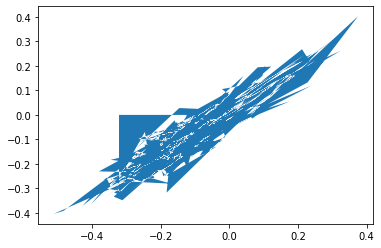

In [64]:
plt.stackplot(my_senti_df['cosine_distance'], my_senti_df['cosine_distance2'])

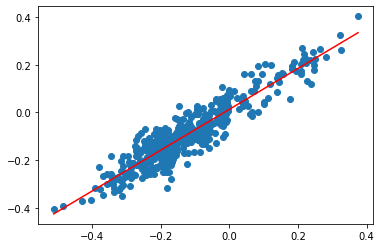

In [65]:
x = my_senti_df['cosine_distance']
y = my_senti_df['cosine_distance2']
plt.scatter(my_senti_df['cosine_distance'], my_senti_df['cosine_distance2'])
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color='red')
plt.show()

In [0]:
from scipy.stats.stats import pearsonr

In [67]:
pearsonr(x,y)

(0.9262886789085895, 1.822030104478651e-189)

In [0]:
from scipy.stats import spearmanr
#https://www.machinelearningmastery.ru/how-to-calculate-nonparametric-rank-correlation-in-python/

In [69]:
spearmanr(x, y)

SpearmanrResult(correlation=0.8874382282960159, pvalue=9.033418685759714e-151)

In [0]:
#больше моделей богу моделей

In [71]:
!wget https://rusvectores.org/static/models/rusvectores4/fasttext/araneum_none_fasttextcbow_300_5_2018.tgz

--2020-06-04 17:01:43--  https://rusvectores.org/static/models/rusvectores4/fasttext/araneum_none_fasttextcbow_300_5_2018.tgz
Resolving rusvectores.org (rusvectores.org)... 116.203.104.23
Connecting to rusvectores.org (rusvectores.org)|116.203.104.23|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2691248108 (2.5G) [application/x-gzip]
Saving to: ‘araneum_none_fasttextcbow_300_5_2018.tgz’

araneum_none_fastte 100%[===================>]   2.51G  28.0MB/s    in 94s     

2020-06-04 17:03:18 (27.3 MB/s) - ‘araneum_none_fasttextcbow_300_5_2018.tgz’ saved [2691248108/2691248108]



In [0]:
!tar -xzf araneum_none_fasttextcbow_300_5_2018.tgz

In [73]:
fasttext_model3 = gensim.models.KeyedVectors.load("araneum_none_fasttextcbow_300_5_2018.model")


/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [0]:
positive_multi_embedding3 = make_seed_embedding(positive_multi_seed, fasttext_model3)
negative_multi_embedding3 = make_seed_embedding(negative_multi_seed, fasttext_model3)

axis3 = positive_multi_embedding3  - negative_multi_embedding3

In [75]:
fasttext_pol3 = []
cosine_lst3 = []
not_in_model3 = []
treshold = 0.03
for i in range(len(my_senti_df['verb'])):
  try:
    cosine = cosine_similarity(np.atleast_2d(fasttext_model3.get_vector(my_senti_df['verb'][i])),\
                              np.atleast_2d(axis3))
    if cosine >= treshold:
      fasttext_pol3.append(1)
    else:
      fasttext_pol3.append(0)
    cosine_lst3.append(cosine[0][0])
  except AttributeError as e:
    not_in_model3.append([i])



print(len(not_in_model3))
# в этой модели не находит аж 146 глаголов!
for i in not_in_model3:
  my_senti_df = my_senti_df.drop(i)
my_senti_df['cosine_distance3'] = cosine_lst3
my_senti_df['fasttext_polarity3'] = fasttext_pol3

146


In [76]:
my_senti_df

,verb,polar_or_not,polarity_summ,падеж второго аргумента в нотации pymorphy2,fasttext_polarity,manual_polarity,cosine_distance,cosine_distance2,fasttext_polarity2,cosine_distance3,fasttext_polarity3
1,арестовывать,4,0,accs,0,0,-0.335984,-0.318138,0,-0.359293,0
2,атаковать,4,0,accs,0,0,-0.201194,-0.164883,0,-0.232847,0
3,беречь,3,3,accs,1,1,0.176308,0.055442,1,0.074086,1
4,беспокоить,2,0,accs,0,0,-0.194101,-0.105247,0,-0.189934,0
5,бить,3,0,accs,0,0,-0.184389,-0.204936,0,-0.206896,0
...,...,...,...,...,...,...,...,...,...,...,...
439,чаять,4,3,datv,1,1,0.066333,0.002245,0,-0.040236,0
440,шантажировать,3,0,accs,0,0,-0.230805,-0.142621,0,-0.246298,0
441,шокировать,4,0,accs,0,0,-0.084724,0.015387,0,-0.126806,0
442,штурмовать,5,0,accs,0,0,-0.107651,-0.091709,0,-0.081259,0


In [77]:
acc = accuracy_score(my_senti_df['manual_polarity'], my_senti_df['fasttext_polarity3'])
micro_f1 = f1_score(my_senti_df['manual_polarity'], my_senti_df['fasttext_polarity3'], average = None)
micro_p = precision_score(my_senti_df['manual_polarity'], my_senti_df['fasttext_polarity3'], average = None)
micro_r = recall_score(my_senti_df['manual_polarity'], my_senti_df['fasttext_polarity3'], average = None)
print('acc={0:1.4f}'.format(acc))
print('F1={0:1.4f}, precision={1:1.4f}, recall={2:1.4f}'.format(micro_f1[-1], micro_p[-1], micro_r[-1]))

acc=0.8725
F1=0.7246, precision=1.0000, recall=0.5682


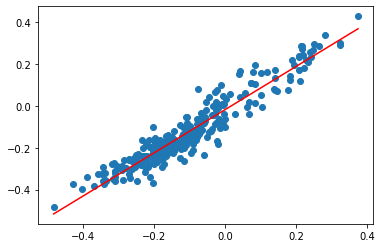

In [78]:
x = my_senti_df['cosine_distance']
y = my_senti_df['cosine_distance3']
plt.scatter(my_senti_df['cosine_distance'], my_senti_df['cosine_distance3'])
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color='red')
plt.show()

In [79]:
pearsonr(x,y)
# 3я модель и хуже отработала, и глаголов ужасно много порезала, но с 1й
# кореллирует лучше, потому что методы одинаковые, а разные только корпусы

(0.950892459909892, 8.552738874576151e-153)

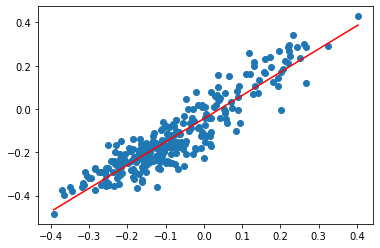

In [82]:
x = my_senti_df['cosine_distance2']
y = my_senti_df['cosine_distance3']
plt.scatter(my_senti_df['cosine_distance2'], my_senti_df['cosine_distance3'])
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color='red')
plt.show()

In [81]:
pearsonr(x,y)

(0.915074932190191, 9.225626528438359e-119)